# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

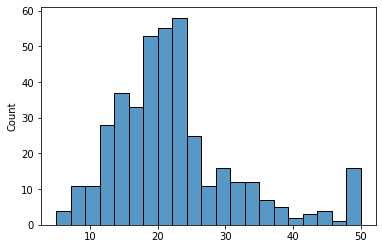

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [3]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [4]:
pd.DataFrame(X_test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       102 non-null    float64
 1   1       102 non-null    float64
 2   2       102 non-null    float64
 3   3       102 non-null    float64
 4   4       102 non-null    float64
 5   5       102 non-null    float64
 6   6       102 non-null    float64
 7   7       102 non-null    float64
 8   8       102 non-null    float64
 9   9       102 non-null    float64
 10  10      102 non-null    float64
 11  11      102 non-null    float64
 12  12      102 non-null    float64
dtypes: float64(13)
memory usage: 10.5 KB


In [5]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000
mean,3.092336,10.901961,11.264902,0.098039,0.544156,6.354157,66.849020,4.011982,9.980392,417.500000,18.374510,364.163333,12.30549
std,5.373088,21.572929,7.084148,0.298836,0.110015,0.672335,29.034993,2.379973,8.772121,177.390477,2.026785,79.138325,6.69540
min,0.013110,0.000000,1.220000,0.000000,0.392000,4.880000,6.000000,1.465500,1.000000,187.000000,13.000000,24.650000,1.92000
25%,0.084840,0.000000,5.455000,0.000000,0.445500,5.966000,42.450000,2.117375,4.000000,279.250000,17.400000,377.692500,7.30500
50%,0.229015,0.000000,9.795000,0.000000,0.532000,6.229000,73.750000,3.324850,5.000000,330.000000,18.900000,392.110000,11.06000
75%,3.779445,16.250000,18.100000,0.000000,0.609000,6.633750,92.975000,5.276650,24.000000,666.000000,20.200000,396.780000,15.91500
max,25.046100,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,31.99000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [6]:
mn = X_train.mean(axis=0)
X_train -= mn
std = X_train.std(axis=0)
X_train /= std

X_test -= mn
X_test /= std
#scaled price
# Note that the quantities used for normalizing the test data are computed using the
# training data. You should never use in your workflow any quantity computed on the
# test data, even for something as simple as data normalization.

In [7]:
from sklearn.preprocessing import StandardScaler, normalize
# Scaling the data so that all the features become comparable
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
#X_normalized = normalize(X_scaled)

from sklearn import preprocessing
X_train_N = preprocessing.scale(X_train)
X_train_N 

##X_train_scaled = pd.DataFrame(scaler.fit_transform(train_X))
##X_train_scaled.columns

###cols=train_X.columns
#X_test_scaled = pd.DataFrame(scaler.fit_transform(test_X))
#X_test_scaled.columns=cols
#X_test_scaled.columns


array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [45]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_N =scaler.transform(X_test) 
X_test_N

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [9]:
#calculate the average score of the train dataset
mean_values = y_train.mean(axis=0)
print("Average values :",mean_values)

Average values : 22.395049504950492


In [10]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [11]:
print("Shape of y_test:",y_test.shape)

Shape of y_test: (102,)


In [12]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_values).mean(axis=0))

MAE for Test Data: 6.533042127742185


# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

def initialize_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(7, activation='relu'))
  model.add(layers.Dense(1))
  
  return model

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
def compile_model(model, optimizer_name):
    model.compile(loss='mse', optimizer=optimizer_name, metrics=['mae'])
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [15]:
# Building your network
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
def initialize_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(7, activation='relu'))
  # regression - no activation function in the last layer
  model.add(layers.Dense(1))
  return model

In [16]:
model = initialize_model();

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
def compile_model(model, optimizer):
    '''return a compiled model suited for the cifar tasks'''
    model.compile(loss='mse', optimizer=optimizer,metrics=['mae', 'mse'])
    
    return model
    # YOUR CODE HERE

In [19]:
 model = compile_model(model, optimizer);

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0.005,patience = 15, verbose = 1,restore_best_weights = True, mode='auto')
history=model.fit(X_train_N, y_train, epochs=10, validation_split=0.3, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/10
9/9 [==============================] - 0s 19ms/step - loss: 113.3274 - mae: 9.1659 - mse: 113.3274 - val_loss: 158.3399 - val_mae: 10.2326 - val_mse: 158.3399
Epoch 2/10
9/9 [==============================] - 0s 13ms/step - loss: 106.4546 - mae: 8.7803 - mse: 106.4546 - val_loss: 150.1662 - val_mae: 9.9083 - val_mse: 150.1662
Epoch 3/10
9/9 [==============================] - 0s 14ms/step - loss: 100.0260 - mae: 8.4348 - mse: 100.0260 - val_loss: 142.9898 - val_mae: 9.6007 - val_mse: 142.9898
Epoch 4/10
9/9 [==============================] - 0s 13ms/step - loss: 94.4155 - mae: 8.1149 - mse: 94.4155 - val_loss: 136.3819 - val_mae: 9.3101 - val_mse: 136.3819
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 89.3820 - mae: 7.8144 - mse: 89.3820 - val_loss: 129.9856 - val_mae: 9.0257 - val_mse: 129.9856
Epoch 6/10
9/9 [==============================] - 0s 13ms/step - loss: 84.6010 - mae: 7.5383 - mse: 84.6010 - val_loss: 123.8642 - val_mae: 8.7424 - val_mse: 

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,84.601021,7.538344,84.601021,123.864227,8.742450,123.864227,5
6,80.016441,7.274481,80.016441,117.953018,8.473105,117.953018,6
7,75.435341,7.022618,75.435341,112.268784,8.211826,112.268784,7
8,71.195259,6.781044,71.195259,106.493927,7.939963,106.493927,8
9,66.889084,6.529932,66.889084,100.789444,7.659319,100.789444,9


❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [39]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

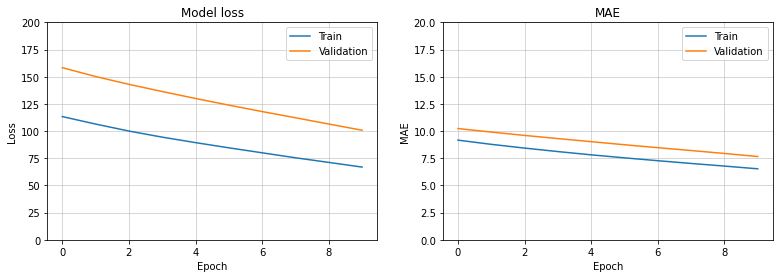

In [40]:
plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 21.2817 - mae: 2.9146 - mse: 21.2817
MAE with the rmsprop optimizer: 2.9146  reached in 20 s after 241 epochs


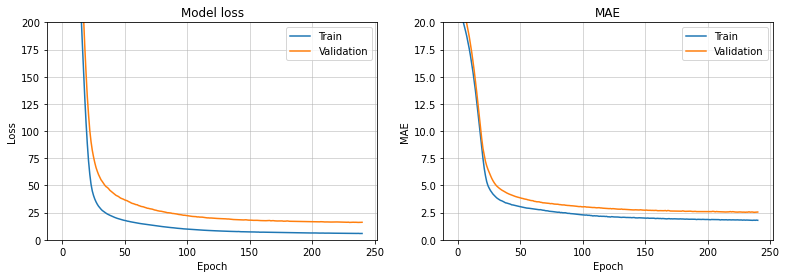

4/4 [==============================] - 0s 3ms/step - loss: 16.3964 - mae: 2.8439 - mse: 16.3964
MAE with the adam optimizer: 2.8439  reached in 29 s after 333 epochs


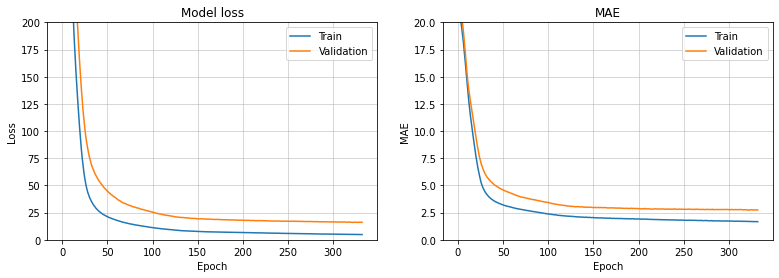

4/4 [==============================] - 0s 2ms/step - loss: 405.3222 - mae: 18.2964 - mse: 405.3222
MAE with the adagrad optimizer: 18.2964  reached in 32 s after 500 epochs


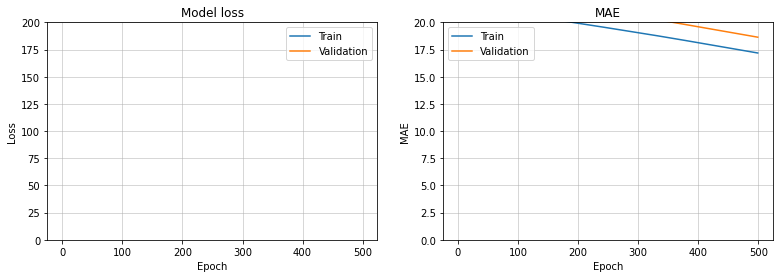

In [41]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

In [43]:
loss, mae, mse = model.evaluate(X_train_N, X_train, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

13/13 - 0s - loss: 28.4673 - mae: 4.7933 - mse: 28.4673
Testing set Mean Abs Error:  4.79


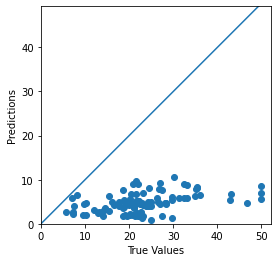

In [47]:
test_predictions = model.predict(X_test_N).flatten()
train_predictions = model.predict(X_train_N).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

YES

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [48]:
# YOUR CODE HERE
# compile the model
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mae', metrics=['accuracy'] )

In [49]:

# fit the model
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0.005,patience = 15, verbose = 1,restore_best_weights = True, mode='auto')
history=model.fit(X_train_N, y_train, epochs=10, validation_split=0.3, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/10
9/9 [==============================] - 1s 49ms/step - loss: 10.8791 - accuracy: 0.0000e+00 - val_loss: 5.8587 - val_accuracy: 0.0000e+00
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 4.5021 - accuracy: 0.0000e+00 - val_loss: 5.5244 - val_accuracy: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 4.7036 - accuracy: 0.0000e+00 - val_loss: 4.6410 - val_accuracy: 0.0000e+00
Epoch 4/10
9/9 [==============================] - 0s 16ms/step - loss: 3.7067 - accuracy: 0.0000e+00 - val_loss: 4.1906 - val_accuracy: 0.0000e+00
Epoch 5/10
9/9 [==============================] - 0s 10ms/step - loss: 2.9607 - accuracy: 0.0000e+00 - val_loss: 3.2306 - val_accuracy: 0.0000e+00
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 2.8741 - accuracy: 0.0000e+00 - val_loss: 3.5344 - val_accuracy: 0.0000e+00
Epoch 7/10
9/9 [==============================] - 0s 10ms/step - loss: 2.4851 - accuracy: 0.0000e+00 - val_loss: 3.55

In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
5,2.745371,0.0,3.534382,0.0,5
6,2.487074,0.0,3.554152,0.0,6
7,2.601061,0.0,3.183999,0.0,7
8,2.411526,0.0,3.165181,0.0,8
9,2.325716,0.0,2.925626,0.0,9


4/4 [==============================] - 0s 2ms/step - loss: 18.1440 - mae: 2.8390 - mse: 18.1440
MAE with the rmsprop optimizer: 2.8390  reached in 18 s after 275 epochs


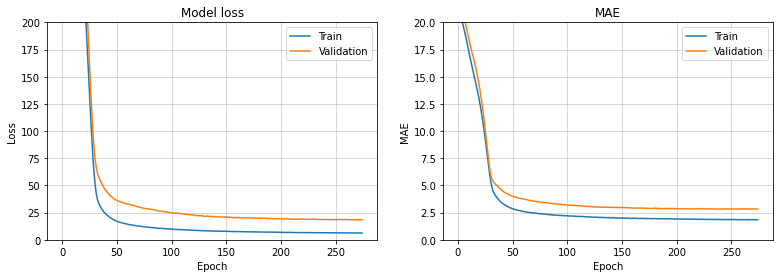

4/4 [==============================] - 0s 2ms/step - loss: 20.3454 - mae: 3.0313 - mse: 20.3454
MAE with the adam optimizer: 3.0313  reached in 29 s after 457 epochs


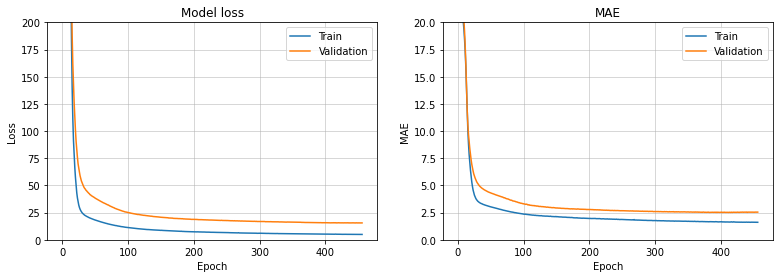

4/4 [==============================] - 0s 2ms/step - loss: 518.6037 - mae: 21.1206 - mse: 518.6037
MAE with the adagrad optimizer: 21.1206  reached in 41 s after 500 epochs


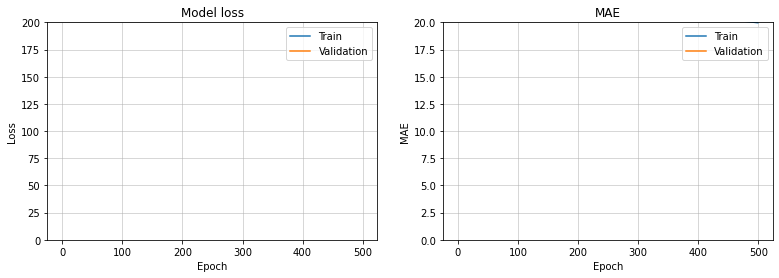

In [51]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 2ms/step - loss: 20.7376 - mae: 2.9701 - mse: 20.7376
MAE with the rmsprop optimizer: 2.9701  reached in 17 s after 182 epochs


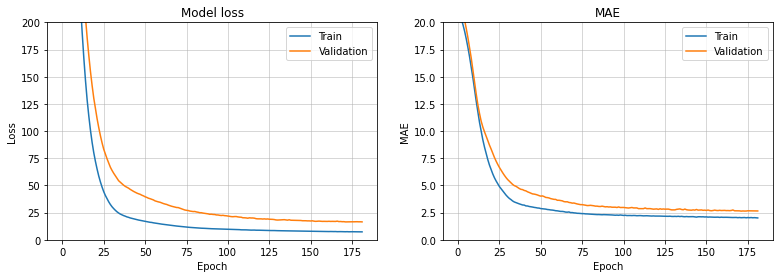

4/4 [==============================] - 0s 2ms/step - loss: 26.1763 - mae: 3.0703 - mse: 26.1763
MAE with the adam optimizer: 3.0703  reached in 27 s after 420 epochs


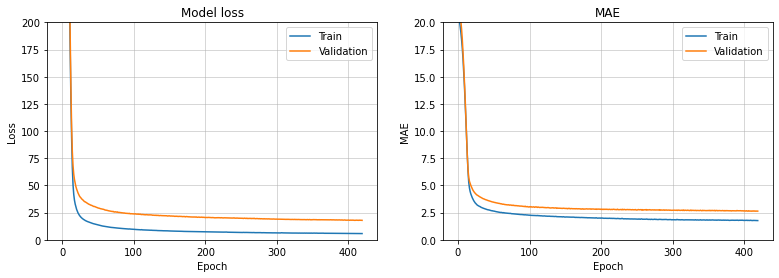

4/4 [==============================] - 0s 2ms/step - loss: 423.4464 - mae: 18.3917 - mse: 423.4464
MAE with the adagrad optimizer: 18.3917  reached in 29 s after 500 epochs


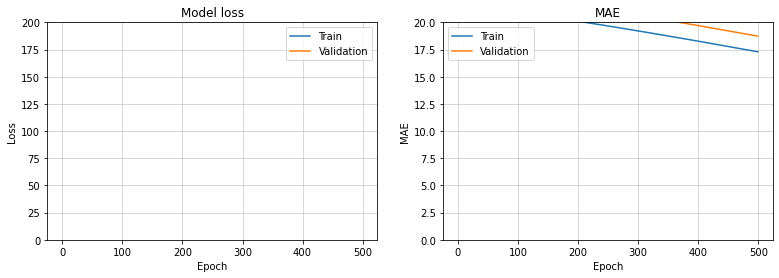

In [52]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

4/4 [==============================] - 0s 3ms/step - loss: 30.0026 - mae: 4.2622 - mse: 30.0026
MAE with the 0.0001 learning rate: 4.2622 reached in 29 s after 500 epochs


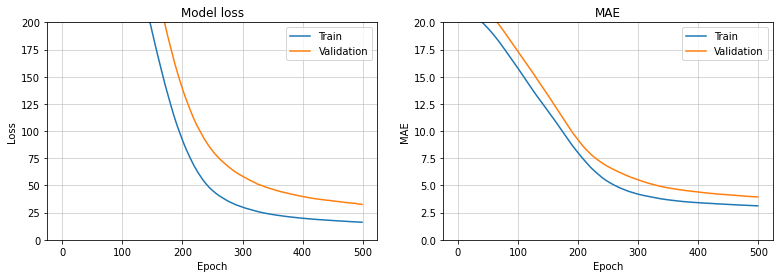

4/4 [==============================] - 0s 1ms/step - loss: 19.9910 - mae: 2.9553 - mse: 19.9910
MAE with the 0.001 learning rate: 2.9553 reached in 17 s after 256 epochs


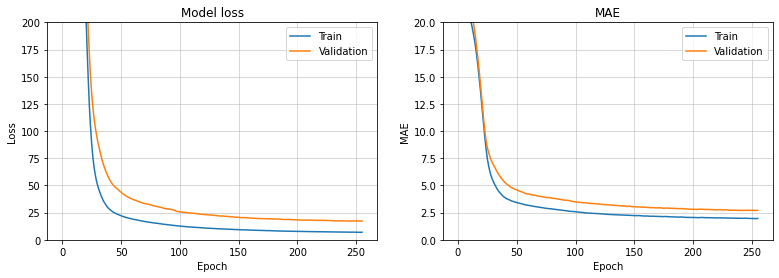

4/4 [==============================] - 0s 2ms/step - loss: 18.6599 - mae: 2.9165 - mse: 18.6599
MAE with the 0.01 learning rate: 2.9165 reached in 4 s after 64 epochs


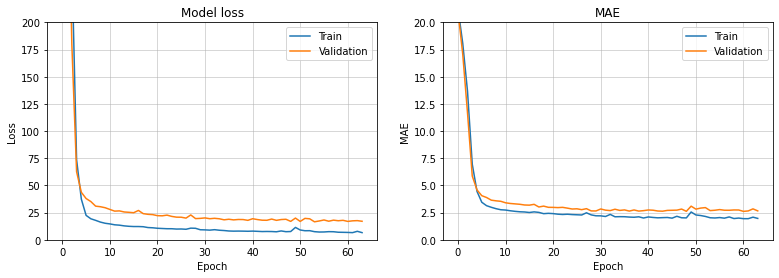

4/4 [==============================] - 0s 2ms/step - loss: 18.6428 - mae: 3.0764 - mse: 18.6428
MAE with the 0.1 learning rate: 3.0764 reached in 2 s after 27 epochs


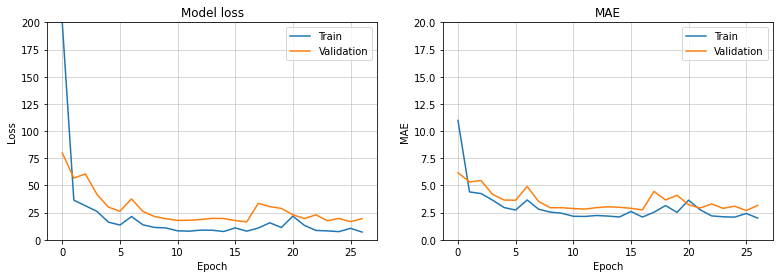

4/4 [==============================] - 0s 2ms/step - loss: 83.5767 - mae: 6.7119 - mse: 83.5767
MAE with the 1 learning rate: 6.7119 reached in 1 s after 13 epochs


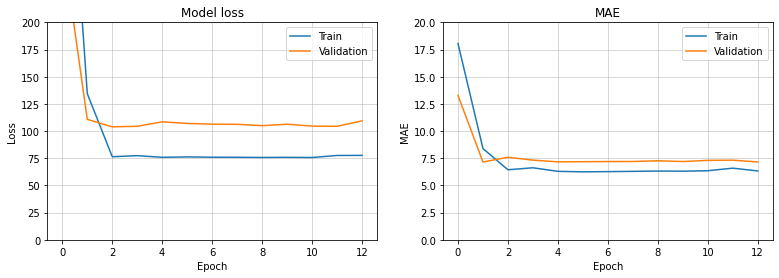

4/4 [==============================] - 0s 2ms/step - loss: 84.2247 - mae: 6.5172 - mse: 84.2247
MAE with the 5 learning rate: 6.5172 reached in 4 s after 72 epochs


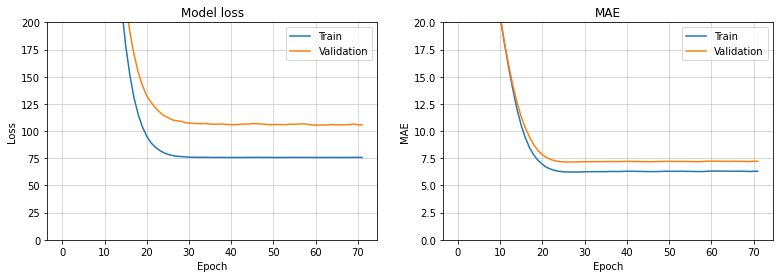

In [57]:
from tensorflow.keras.optimizers import Adam
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    start_time = time.time()
    opt = Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model, opt)  
    
    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.01, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    #shuffle=True
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [58]:

# YOUR CODE HERE
# Building your network
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential
def initialize_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu',input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(7, activation='relu'))
  # regression - no activation function in the last layer
  model.add(layers.Dense(1))
  model.compile(loss='mae', optimizer=optimizer,metrics=['mae', 'mse'])
  return model

In [59]:
model = initialize_model();

In [60]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_52 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 8         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [61]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0.005,patience = 15, verbose = 1,restore_best_weights = True, mode='auto')
history=model.fit(X_train_N, y_train, epochs=10, validation_split=0.3, validation_data=(X_test, y_test), callbacks=[earlystop])

Epoch 1/10
9/9 [==============================] - 1s 35ms/step - loss: 21.9877 - mae: 21.9877 - mse: 570.9547 - val_loss: 23.0313 - val_mae: 23.0313 - val_mse: 635.7171
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 21.7678 - mae: 21.7678 - mse: 548.6847 - val_loss: 22.9797 - val_mae: 22.9797 - val_mse: 633.2699
Epoch 3/10
9/9 [==============================] - 0s 12ms/step - loss: 21.5090 - mae: 21.5090 - mse: 545.8920 - val_loss: 22.9382 - val_mae: 22.9382 - val_mse: 631.3068
Epoch 4/10
9/9 [==============================] - 0s 11ms/step - loss: 21.8838 - mae: 21.8838 - mse: 553.9406 - val_loss: 22.9021 - val_mae: 22.9021 - val_mse: 629.6025
Epoch 5/10
9/9 [==============================] - 0s 13ms/step - loss: 20.8501 - mae: 20.8501 - mse: 515.8263 - val_loss: 22.8700 - val_mae: 22.8700 - val_mse: 628.0790
Epoch 6/10
9/9 [==============================] - 0s 20ms/step - loss: 21.4402 - mae: 21.4402 - mse: 531.7177 - val_loss: 22.8402 - val_mae: 22.8402 - val_m

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

In [62]:
loss, mae, mse = model.evaluate(X_test_N, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

4/4 - 0s - loss: 22.3749 - mae: 22.3749 - mse: 583.6859
Testing set Mean Abs Error: 22.37


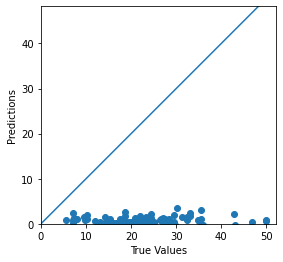

In [63]:
test_predictions = model.predict(X_test_N).flatten()
train_predictions = model.predict(X_train_N).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

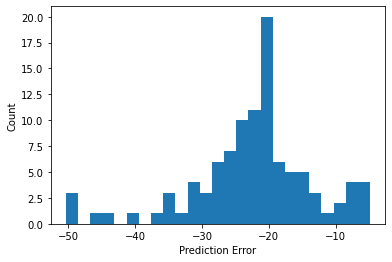

In [65]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(y_test, test_predictions)
print('Mean Absolute Error: ',mae)

Mean Squared Error:  583.6858426626791
Mean Absolute Error:  22.37489907301086


### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [68]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,21.308456,21.308456,531.012695,22.840227,22.840227,626.676147,5
6,21.277691,21.277691,529.685303,22.812559,22.812559,625.375488,6
7,21.249044,21.249044,528.471863,22.786402,22.786402,624.144714,7
8,21.222107,21.222107,527.294067,22.761646,22.761646,622.977661,8
9,21.196667,21.196667,526.210999,22.737837,22.737837,621.853027,9


In [69]:
model.save('ft.h5')
# YOUR CODE HERE

In [70]:
from tensorflow.keras.models import load_model
model = load_model('ft.h5')

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [71]:
# YOUR CODE
# Evaluate the model on test data
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 22.3749
Test Accuracy : 22.3749


## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [28]:

# snippet of using the LearningRateScheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
import math
# YOUR CODE HERE
initial_lr = 0.001
initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)
# Fit the model to the training data
history_exp_decay = model.fit(
    X_train, 
    y_train,
    epochs=5000, 
    validation_split=0.2,validation_data=(X_test, y_test),
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],)

Epoch 1/5000

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
11/11 [==============================] - 1s 56ms/step - loss: 4971.1802 - mae: 61.9902 - mse: 4971.1802 - val_loss: 2999.6919 - val_mae: 48.8938 - val_mse: 2999.6919
Epoch 2/5000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009048374180359595.
11/11 [==============================] - 0s 32ms/step - loss: 1298.9586 - mae: 26.2493 - mse: 1298.9586 - val_loss: 522.9866 - val_mae: 19.1673 - val_mse: 522.9866
Epoch 3/5000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.008187307530779819.
11/11 [==============================] - 0s 27ms/step - loss: 704.9385 - mae: 21.7052 - mse: 704.9385 - val_loss: 409.5523 - val_mae: 16.3942 - val_mse: 409.5523
Epoch 4/5000

Epoch 00004: LearningRateScheduler reducing learning rate to 0.007408182206817179.
11/11 [==============================] - 0s 29ms/step - loss: 287.1128 - mae: 12.7402 - mse: 287.1128 - val_loss: 230.4807 - val_mae: 11

In [2]:
plot_loss_mae(history_exp_decay)

NameError: name 'plot_loss_mae' is not defined

In [180]:
def exp_decay(epoch):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * exp(-k*t)
   return lrate
lrate = LearningRateScheduler(exp_decay)